In [1]:
#importing all the nesseasary libraries
from collections import Counter,OrderedDict
import ipywidgets as widgets
import itertools
import pandas as pd
import json
from urllib.request import urlopen

In [2]:
#Load projects
url="https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/projects.json"
projects=json.loads(urlopen(url).read())
print(json.dumps(projects[-305],indent=2))

{
  "id": 324,
  "title": "AdverTorch",
  "description": "A Toolbox for Adversarial Robustness Research",
  "tags": [
    "code",
    "library",
    "security",
    "adversarial-learning",
    "adversarial-attacks",
    "adversarial-perturbations"
  ]
}


In [3]:
# Creating a pandas dataframe 
df=pd.DataFrame(projects)
print(f"{len(df)} projects")
df.head(5)

2032 projects


,id,title,description,tags
0,2438,How to Deal with Files in Google Colab: What Y...,How to supercharge your Google Colab experienc...,"[article, google-colab, colab, file-system]"
1,2437,Rasoee,A powerful web and mobile application that ide...,"[api, article, code, dataset, paper, research,..."
2,2436,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,"[article, deep-learning, machine-learning, dim..."
3,2435,Top “Applied Data Science” Papers from ECML-PK...,Explore the innovative world of Machine Learni...,"[article, deep-learning, machine-learning, adv..."
4,2434,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,"[article, code, pytorch, library, 3d, computer..."


In [4]:
#Loading the tags
url1="https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/tags.json"
tags_dict=OrderedDict(json.loads(urlopen(url1).read()))
print(f"{len(tags_dict)} tags")


400 tags


In [5]:
@widgets.interact(tag=list(tags_dict.keys()))
def display_tag_details(tag='question-answering'):
    print(json.dumps(tags_dict[tag],indent=2))

interactive(children=(Dropdown(description='tag', index=283, options=('3d', 'action-localization', 'action-rec…

In [6]:
#Combining the projects title and descrption separately as feature but we'll combine them to create on input feature

df['text']= df.title+" "+ df.description
df.head(5)

,id,title,description,tags,text
0,2438,How to Deal with Files in Google Colab: What Y...,How to supercharge your Google Colab experienc...,"[article, google-colab, colab, file-system]",How to Deal with Files in Google Colab: What Y...
1,2437,Rasoee,A powerful web and mobile application that ide...,"[api, article, code, dataset, paper, research,...",Rasoee A powerful web and mobile application t...
2,2436,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,"[article, deep-learning, machine-learning, dim...",Machine Learning Methods Explained (+ Examples...
3,2435,Top “Applied Data Science” Papers from ECML-PK...,Explore the innovative world of Machine Learni...,"[article, deep-learning, machine-learning, adv...",Top “Applied Data Science” Papers from ECML-PK...
4,2434,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,"[article, code, pytorch, library, 3d, computer...",OpenMMLab Computer Vision MMCV is a python lib...


In [7]:
#Constrains
def filter(l,include=[],exclude=[]):
    """
    Filtering a list using inclution and exclution list of items 
    """
    filtered=[item for item in l if item in include and item not in exclude]
    return filtered

In [8]:
# Inclusion/exclusion criteria for tags
include = list(tags_dict.keys())
exclude = ['machine-learning', 'deep-learning',  'data-science',
           'neural-networks', 'python', 'r', 'visualization']

In [9]:
#Filter tags for each project
df.tags=df.tags.apply(filter,include=include,exclude=exclude)
tags=Counter(itertools.chain.from_iterable(df.tags.values))

In [10]:
@widgets.interact(min_tag_freq=(0,tags.most_common()[0][1]))
def separate_tag_by_freq(min_tag_freq=30):
    tags_above_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] >= min_tag_freq)
    tags_below_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] < min_tag_freq)
    print ("Most popular tags:\n", tags_above_freq.most_common(5))
    print ("\nTags that just made the cut:\n", tags_above_freq.most_common()[-5:])
    print ("\nTags that just missed the cut:\n", tags_below_freq.most_common(5))



interactive(children=(IntSlider(value=30, description='min_tag_freq', max=429), Output()), _dom_classes=('widg…

In [11]:
min_tag_freq = 30
tags_above_freq = Counter(tag for tag in tags.elements()
                          if tags[tag] >= min_tag_freq)
df.tags = df.tags.apply(filter, include=list(tags_above_freq.keys()))


In [12]:
df = df[df.tags.map(len) > 0]
print (f"{len(df)} projects")

1444 projects


# Exploratory data analysis
NOTE: Revisit and re-do EDA when your data grows

In [13]:
!pip install wordcloud

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)


In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
warnings.filterwarnings("ignore")

## Tags Per Project
Q. How many tags do the projects have ?

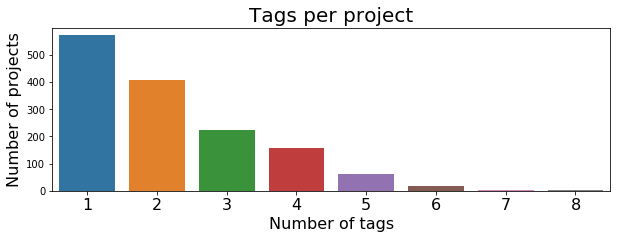

In [15]:
num_tags_per_project=[len(tags) for tags in df.tags]
num_tags,num_projects=zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10,3))
ax=sns.barplot(list(num_tags),list(num_projects))
plt.title("Tags per project",fontsize=20)
plt.xlabel("Number of tags", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

## Tag distrbution
What are the most popular tags?

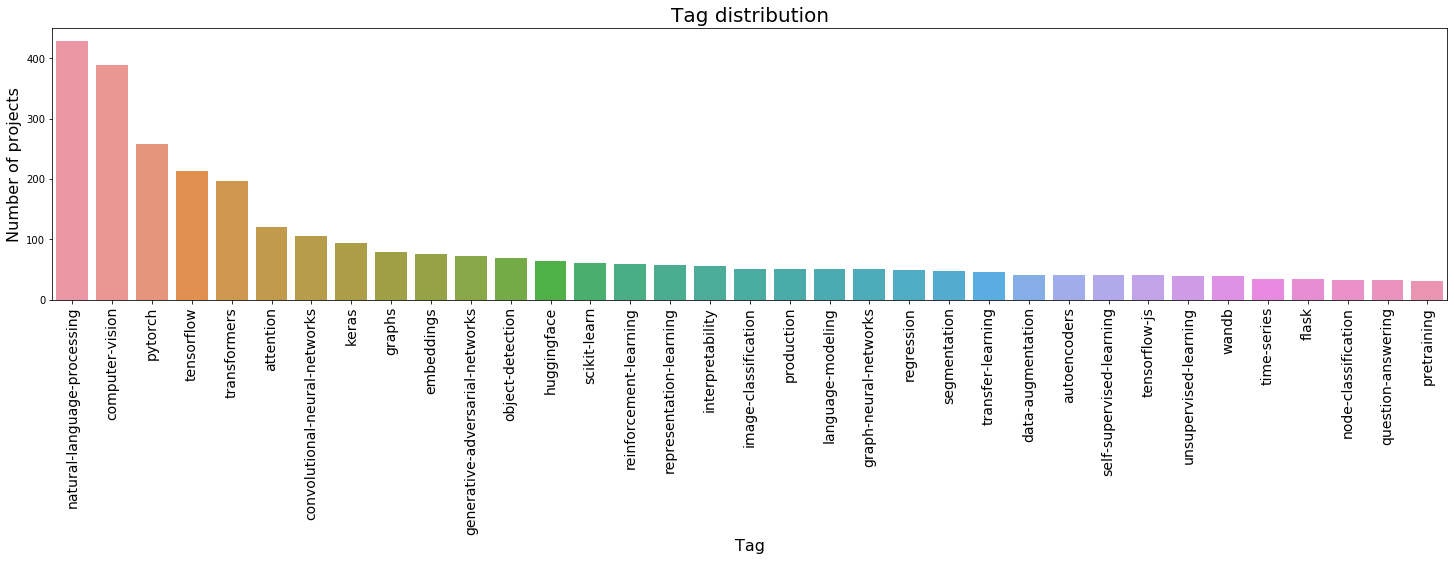

In [16]:
all_tags = list(itertools.chain.from_iterable(df.tags.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

## Wordcloud
Is there enough signal in the title and description that's unique to each tag?

In [17]:
@widgets.interact(tag=list(tags))
def display_word_cloud(tag='pytorch'):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = df[df.tags.apply(lambda tags: tag in tags)]
    text = subset.text.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color='black', collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis('off')
    plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=2, options=('natural-language-processing', 'computer-v…

# Splitting

In [18]:
import numpy as np
import random 


In [19]:
seed=42
np.random.seed(seed)
random.seed(seed)

In [20]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.text.to_numpy()
y = df.tags

In [30]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(list(itertools.chain.from_iterable(y)))
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        y_one_hot = np.zeros((len(y), len(self.class_to_index)),dtype=int)
        for i, item in enumerate(y):
            for class_ in item:
                y_one_hot[i][self.class_to_index[class_]] = 1
        return y_one_hot

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            indices = np.where(item == 1)[0]
            classes.append([self.index_to_class[index] for index in indices])
        return classes

    def save(self, fp):
        with open(fp, 'w') as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, 'r') as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [31]:
#encode 
label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [32]:

label_encoder.class_to_index

{'attention': 0,
 'autoencoders': 1,
 'computer-vision': 2,
 'convolutional-neural-networks': 3,
 'data-augmentation': 4,
 'embeddings': 5,
 'flask': 6,
 'generative-adversarial-networks': 7,
 'graph-neural-networks': 8,
 'graphs': 9,
 'huggingface': 10,
 'image-classification': 11,
 'interpretability': 12,
 'keras': 13,
 'language-modeling': 14,
 'natural-language-processing': 15,
 'node-classification': 16,
 'object-detection': 17,
 'pretraining': 18,
 'production': 19,
 'pytorch': 20,
 'question-answering': 21,
 'regression': 22,
 'reinforcement-learning': 23,
 'representation-learning': 24,
 'scikit-learn': 25,
 'segmentation': 26,
 'self-supervised-learning': 27,
 'tensorflow': 28,
 'tensorflow-js': 29,
 'time-series': 30,
 'transfer-learning': 31,
 'transformers': 32,
 'unsupervised-learning': 33,
 'wandb': 34}

In [33]:
y = label_encoder.encode(y)


In [ ]:
!pip install scikit-multilearn==0.2.0 -q

Naive splitiing

In [34]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix


In [35]:
# Split sizes
train_size=0.7
val_size=0.15
test_size=0.15

In [36]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size)

In [37]:

print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 1010 (0.70)
remaining: 434 (0.30)


In [38]:
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

In [39]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1010 (0.70)
val: 217 (0.15)
test: 217 (0.15)


In [40]:
# Get counts for each class
counts = {}
counts['train_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts['val_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts['test_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [41]:
# View distributions
pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)


,"(15,)","(7,)","(2,)","(26,)","(3,)","(22,)","(13,)","(17,)","(28,)","(34,)",...,"(8,)","(9,)","(27,)","(31,)","(18,)","(6,)","(21,)","(25,)","(10,)","(16,)"
train,303,59,271,36,76,33,62,47,156,28,...,35,52,30,33,21,25,25,38,48,22
val,72,5,60,6,14,8,15,14,30,6,...,4,10,5,8,5,6,6,11,6,7
test,54,9,57,6,16,8,16,8,27,5,...,12,16,5,5,4,3,1,11,10,4


In [42]:
# Adjust counts across splits
for k in counts['val_counts'].keys():
    counts['val_counts'][k] = int(counts['val_counts'][k] * \
        (train_size/val_size))
for k in counts['test_counts'].keys():
    counts['test_counts'][k] = int(counts['test_counts'][k] * \
        (train_size/test_size))

In [43]:
dist_df = pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)
dist_df


,"(15,)","(7,)","(2,)","(26,)","(3,)","(22,)","(13,)","(17,)","(28,)","(34,)",...,"(8,)","(9,)","(27,)","(31,)","(18,)","(6,)","(21,)","(25,)","(10,)","(16,)"
train,303,59,271,36,76,33,62,47,156,28,...,35,52,30,33,21,25,25,38,48,22
val,336,23,280,28,65,37,70,65,140,28,...,18,46,23,37,23,28,28,51,28,32
test,252,42,266,28,74,37,74,37,126,23,...,56,74,23,23,18,14,4,51,46,18


In [44]:
np.mean(np.std(dist_df.to_numpy(), axis=0))

8.472316812773736

Stratified split

In [45]:
from skmultilearn.model_selection import IterativeStratification

In [46]:
def iterative_train_test_split(X, y, train_size):
    """Custom iterative train test split which
    'maintains balanced representation with respect
    to order-th label combinations.'
    """
    stratifier = IterativeStratification(
        n_splits=2, order=1, sample_distribution_per_fold=[1.0-train_size, train_size, ])
    train_indices, test_indices = next(stratifier.split(X, y))
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [47]:
# Get data
X = df.text.to_numpy()
y = df.tags

In [48]:
# Binarize y
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.encode(y)

In [49]:
# Split
X_train, X_, y_train, y_ = iterative_train_test_split(
    X, y, train_size=train_size)
X_val, X_test, y_val, y_test = iterative_train_test_split(
    X_, y_, train_size=0.5)

In [50]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1000 (0.69)
val: 225 (0.16)
test: 219 (0.15)


In [51]:
# Get counts for each class
counts = {}
counts['train_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts['val_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts['test_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [52]:
# Adjust counts across splits
for k in counts['val_counts'].keys():
    counts['val_counts'][k] = int(counts['val_counts'][k] * \
        (train_size/val_size))
for k in counts['test_counts'].keys():
    counts['test_counts'][k] = int(counts['test_counts'][k] * \
        (train_size/test_size))

In [53]:
# View distributions
pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)

,"(2,)","(4,)","(15,)","(14,)","(30,)","(34,)","(1,)","(26,)","(32,)","(20,)",...,"(28,)","(11,)","(22,)","(8,)","(29,)","(23,)","(31,)","(10,)","(18,)","(12,)"
train,272,29,300,36,24,27,29,32,145,181,...,149,30,34,38,26,41,32,45,21,38
val,270,37,303,46,23,28,28,46,144,177,...,149,28,32,28,23,42,32,46,23,42
test,270,18,298,23,23,28,28,28,93,182,...,149,70,37,32,42,42,32,42,18,37


In [54]:
dist_df = pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)

In [55]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

3.7028784085706548

Iterative stratification essentially creates splits while "trying to maintain balanced representation with respect to order-th label combinations". We used to an order=1 for our iterative split which means we cared about providing representative distribution of each tag across the splits. But we can account for higher-order label relationships as well where we may care about the distribution of label combinations.

# Preporcessing 